Влияние различных факторов на степень удовлетворенности онлайн курсами

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_excel('/Users/Gelechka/Downloads/archive/Maven Business School.xlsx')
df

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.200,No,252.000000,276.0,Placed,111000
1,2,Business,62.1,92.800,No,423.000000,410.0,Not Placed,NaN
2,3,Computer Science,70.2,68.700,Yes,101.000000,119.0,Placed,107000
3,4,Engineering,75.1,80.700,No,288.000000,334.0,Not Placed,NaN
4,5,Finance,60.9,74.900,No,248.000000,252.0,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...
1195,1196,Business,32.5,30.875,Yes,167.323980,410.2,Placed,
1196,1197,Computer Science,32.8,31.160,No,167.238571,413.3,Placed,117667
1197,1198,Engineering,33.1,31.445,No,167.153163,416.4,Not Placed,131667
1198,1199,Finance,33.4,31.730,No,167.067755,419.5,Placed,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1164 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   object 
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   object 
 8   Annual Salary           933 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 84.5+ KB


У нас есть пропущенные значения, заменим их нулем как достаточно подходящим значением (пустые оценки и запрплату можно приравнять к нулю)

In [4]:
df.fillna(0, inplace = True)
df['Annual Salary'] = df['Annual Salary'].apply(lambda x: 0 if x == ' ' else x).astype(np.float64) # есть пробелы нужно заменить на нули

Посмотрим на наши данные, для этого применим различные визуализации

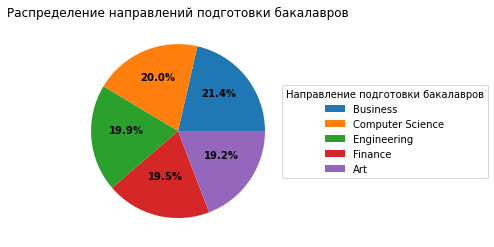

In [5]:
fig, ax = plt.subplots()    #посторим пайчарт
def func(perc, values):     #функция нормировки значений
    absolute = int(np.round(perc/100.*np.sum(values)))
    return "{:.1f}%\n".format(perc)

part, texts, heading = ax.pie(df['Undergrad Degree'].value_counts(), autopct=lambda pct: func(pct, df['Undergrad Degree'].value_counts()),                                )
ax.legend(part, df['Undergrad Degree'].unique(),
          title="Направление подготовки бакалавров",
          loc="center",
          bbox_to_anchor=(1.2, 0, 0.5, 1)) #выровняем легенду чтобы не залезала на график

plt.setp(heading, size=10, weight="bold")
ax.set_title("Распределение направлений подготовки бакалавров")
plt.show()

Мы видим, что студентов с каждым бэкраундом примерно одинаковое количество

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad Degree', ylabel='MBA Grade'>

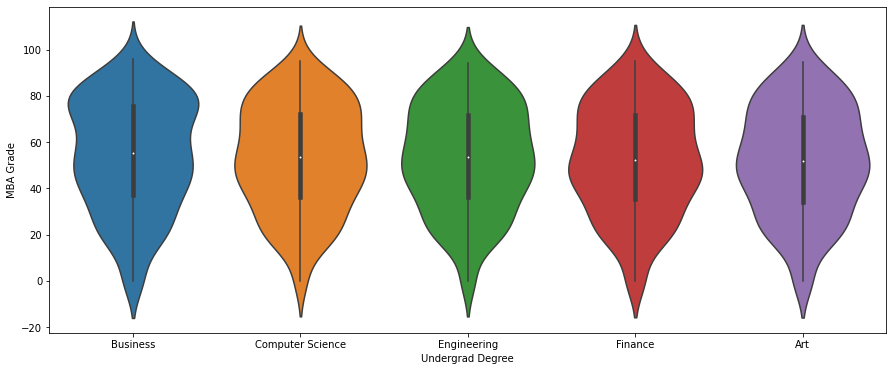

In [6]:
plt.figure(figsize=(15,6)) #нужно увеличить размер, чтобы названия не сливались
sns.violinplot('Undergrad Degree','MBA Grade',data=df)

Распределение оценок MBA визуально несильно различается в разрезе предыдщего опыта (диплма бакалавра), за исключением степени бакалавра бизнеса 


Посмотрим парные графики для всех пар переменных для оценки, данных генерации гипотез и выбора переменной для построения регрессий

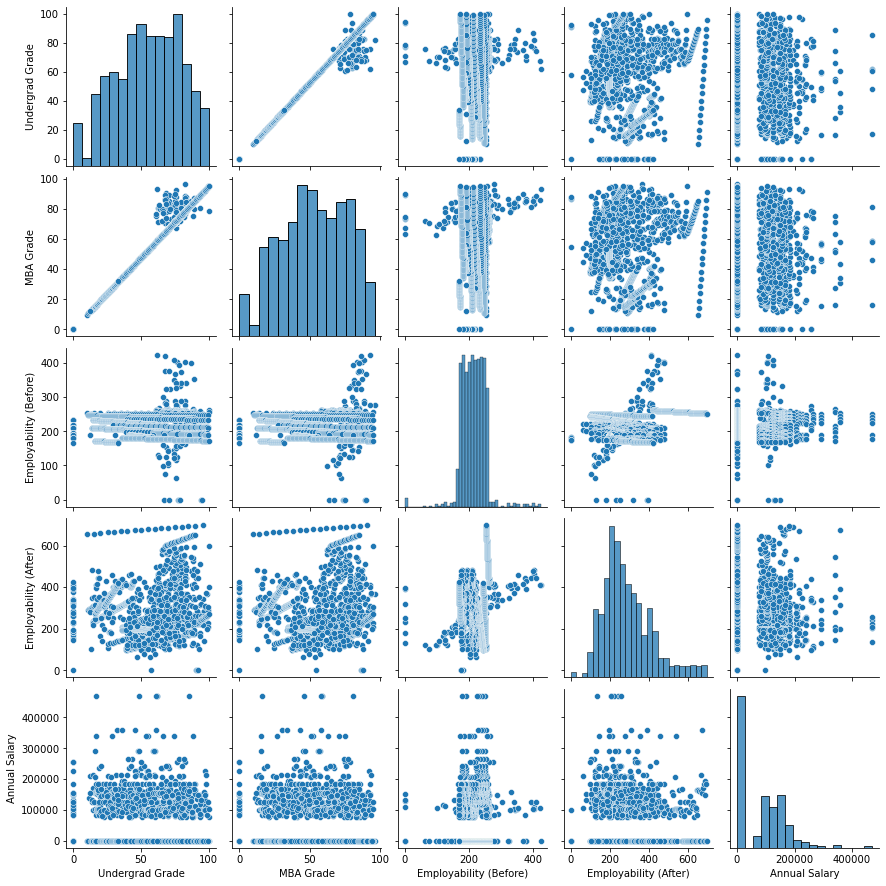

In [7]:
sns.pairplot(df.drop(['Student ID'], axis = 1))

## Гипотеза 1: Вероятность найти работу после MBA с различным опытом бакалавра не различается

Наши переменные категориальные, воспользуемся критерием хи-квадрат

H0: Наличие работы после MBA не связано с предыдущим образованием
H1: Существует статистически значимая зависимость между предыдущим образованием и наличием работы.

In [8]:
ct_MPI = df.groupby('Undergrad Degree')['Status'].value_counts().unstack() 
ct_MPI

Status,Not Placed,Placed
Undergrad Degree,,
Art,224,6
Business,17,240
Computer Science,9,231
Engineering,230,9
Finance,4,230


In [9]:

chi_2, p_val, dof, expected = scipy.stats.chi2_contingency(ct_MPI, correction = False)
output = "chi_2: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi_2,dof, p_val))

chi_2: 1021.4286957111007
degrees of freedom: 4
p-value: 8.102228587883412e-220



In [10]:
alpha = 0.05 
critical_value = scipy.stats.chi2.ppf(1- alpha, dof)
critical_value


9.487729036781154

In [11]:
if chi_2 >= critical_value:
    print('Н0 не подтверждена')
else:
    print('Н0 подтверждена')

Н0 не подтверждена


In [12]:
if p_val < alpha:
    print('Н0 не подтверждена')
else:
    print('Н0 подтверждена')

Н0 не подтверждена


### Таким образом мы видим, что существует статистически значимая зависимость между дипломом бакалавра и устроенностью на работу.

### Теперь проверим зависимость уровня зарплаты от оценок MBA и оценок в бакалавриате, причем выраженную не в абсолютных, а нормированных значениях для лучше интерпретации результатов. Для этого мы используем логистическую регрессию. Для лучшей интерпретации уберем из модели бакалавров искусств и инженеров, тк большиносто из них не было устроено на работу.

In [13]:
def get_salary_cat(salary):
    if salary <= df['Annual Salary'].quantile(0.5):
        return '0'
    else:
        return '1'

In [14]:
df_log = df[(df['Undergrad Degree'] != 'Art') & (df['Undergrad Degree'] != 'Engineering')]

df_log['Salary_cat'] = df_log['Annual Salary'].apply(get_salary_cat)
df_log['Salary_cat'] = df_log['Salary_cat'].astype(int)
df_log['Salary_cat']

<ipython-input-14-5bcfa47bd9e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['Salary_cat'] = df_log['Annual Salary'].apply(get_salary_cat)
<ipython-input-14-5bcfa47bd9e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['Salary_cat'] = df_log['Salary_cat'].astype(int)


0       1
1       0
2       1
4       0
5       0
       ..
1191    0
1193    0
1195    0
1196    1
1198    0
Name: Salary_cat, Length: 731, dtype: int64

In [15]:


x = sm.add_constant(df_log[["Undergrad Grade", "MBA Grade"]].apply(stats.zscore))
y = df_log['Salary_cat']

logr = sm.Logit(y, x)
log_res = logr.fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.691060
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Salary_cat   No. Observations:                  731
Model:                          Logit   Df Residuals:                      728
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                0.002945
Time:                        21:13:27   Log-Likelihood:                -505.16
converged:                       True   LL-Null:                       -506.66
Covariance Type:            nonrobust   LLR p-value:                    0.2249
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0200      0.074     -0.270      0.787      -0.165       0.125
Undergrad Grad

Мы видим что есть стат. значимая зависимость (уровень 0.1). Причем зависимость для оценок бакалавриата и МБА разнонаправленная, что является относительно нетривиальным результатом. Однако уровень стат. значимости достаточно низкий. При выборе более строгих и широкоиспользуемых порогов 0.05 или 0.01 результат нельзя было бы интерпретировать как значимую зависимость.

### Посмотрим, есть ли зависимость оценки MBA от оценки бакалавриата. Здесь мы применим модель линейной регрессии.

In [16]:

x = sm.add_constant(df["Undergrad Grade"] )
y = df["MBA Grade"]



linr = sm. OLS(y, x)
lin_res = linr.fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              MBA Grade   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 5.423e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:13:27   Log-Likelihood:                -3189.3
No. Observations:                1200   AIC:                             6383.
Df Residuals:                    1198   BIC:                             6393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2828      0.249     

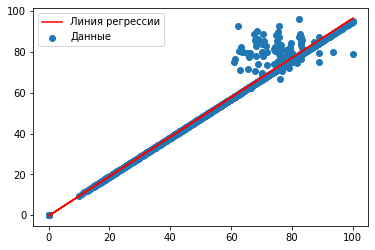

In [17]:
plt.scatter(df["Undergrad Grade"], y , label = 'Данные')

plt.plot(df["Undergrad Grade"], -0.282849 + 0.968062*df["Undergrad Grade"], 'r' , label = 'Линия регрессии' )
plt.legend()
plt.show()



### Мы видим что есть стат. значимая зависимость. Это также можно наблюдать на графике pairplot, где прослеживается прямая с небольшим облаком людей повысивших оценки в MBA по сравнению с бакалавриатом

### Построим модель линейной регрессии и проверим ее предсказательную силу

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=50) #поделим на тренировочную и тестовую выборки
Lin_reg_model = LinearRegression() 
Lin_reg_model.fit(x_train, y_train) #тренируем модель
y_pred = Lin_reg_model.predict(x_test)

print('Точность = ', Lin_reg_model.score(x_test, y_test))

Точность =  0.981085171302512


#### Получили неплохую точность, что вполне ожидаемо при наблюдении графика оценка бакалавра-оценка MBA, на котором явно виден линейный тренд.